In [1]:
!pip install -U vnstock3

In [2]:
# Import libraries
from vnstock3 import Vnstock

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model
import statsmodels.api as sm
from statsmodels import regression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

## Applying GARCH-Family Model for VNINDEX

In [3]:
# Defining the time periods to use
start = "2020-01-01"
end = "2024-12-31"

In [4]:
# Getting VNINDEX data
vnindex = Vnstock().stock(symbol='VNINDEX', source='VCI')
market_df = vnindex.quote.history(start=start, end=end)
market_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
market_df.set_index('Date', inplace=True)
market_df

2024-07-25 21:33:13,134 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02 07:00:00,960.26,966.67,959.67,966.67,131523160
2020-01-03 07:00:00,968.72,970.88,965.14,965.14,149202550
2020-01-06 07:00:00,962.79,963.20,955.59,955.79,140978550
2020-01-07 07:00:00,955.39,959.46,953.19,958.88,130272030
2020-01-08 07:00:00,954.13,955.84,945.28,948.98,179374340
...,...,...,...,...,...
2024-07-19 07:00:00,1274.44,1279.94,1260.68,1264.78,791804100
2024-07-22 07:00:00,1264.78,1267.43,1245.02,1254.64,923629363
2024-07-23 07:00:00,1256.36,1258.74,1231.81,1231.81,728380946


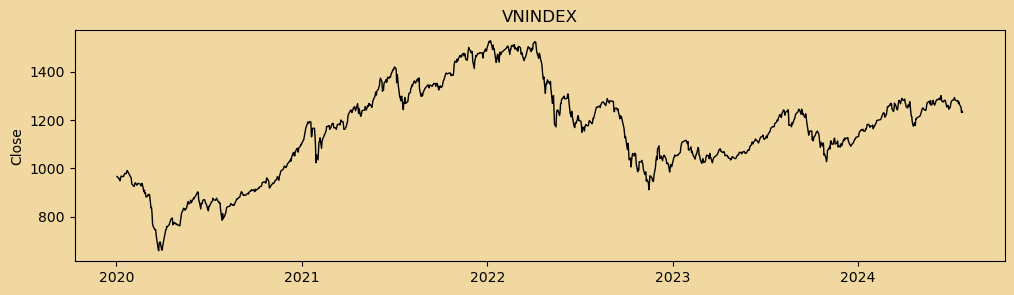

In [5]:
# Plotting Close Price of VNINDEX
fig, ax = plt.subplots(figsize=(12,3))
fig.set_facecolor("#F0D8A0")
ax.set_facecolor("#F0D8A0")
ax.plot(market_df.Close, linewidth=1, color='k')
ax.set(title="VNINDEX", ylabel='Close');

In [6]:
# Calculating Daily Simple Return of VNINDEX
market_returns = (market_df.Close.pct_change().dropna()) * 100
market_returns

Date
2020-01-03 07:00:00   -0.158275
2020-01-06 07:00:00   -0.968771
2020-01-07 07:00:00    0.323293
2020-01-08 07:00:00   -1.032455
2020-01-09 07:00:00    1.177053
                         ...   
2024-07-19 07:00:00   -0.757980
2024-07-22 07:00:00   -0.801720
2024-07-23 07:00:00   -1.819645
2024-07-24 07:00:00    0.540668
2024-07-25 07:00:00   -0.426332
Name: Close, Length: 1138, dtype: float64

In [7]:
# Descriptive Statistic
market_returns.describe()

count    1138.000000
mean        0.030144
std         1.317470
min        -6.674444
25%        -0.448609
50%         0.155197
75%         0.733601
max         4.980051
Name: Close, dtype: float64

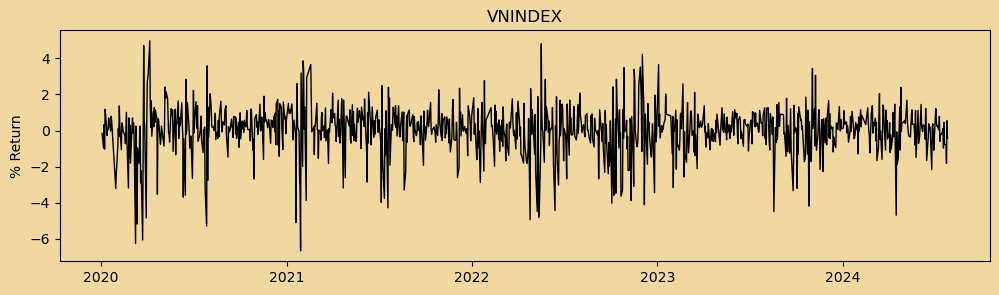

In [8]:
# Plotting % Return of VNINDEX
fig, ax = plt.subplots(figsize=(12,3))
fig.set_facecolor("#F0D8A0")
ax.set_facecolor("#F0D8A0")
ax.plot(market_returns, linewidth=1, color='k')
ax.set(title="VNINDEX", ylabel="% Return");

In [9]:
# Stationarity Test (ADF test)
market_adf_test = adfuller(market_returns)
print("ADF Statistic:", round(market_adf_test[0], 3))
print("P-value:", round(market_adf_test[1], 2))
print("Critical Values:")
for key, value in market_adf_test[4].items():
    print(f'   {key}: {value}')

if market_adf_test[1] < 0.05:
    print("Return series of VNINDEX is stationary")
else:
    print("Return series of VNINDEX is not stationary")

ADF Statistic: -31.585
P-value: 0.0
Critical Values:
   1%: -3.436114401808766
   5%: -2.8640853428381092
   10%: -2.568125207156112
Return series of VNINDEX is stationary


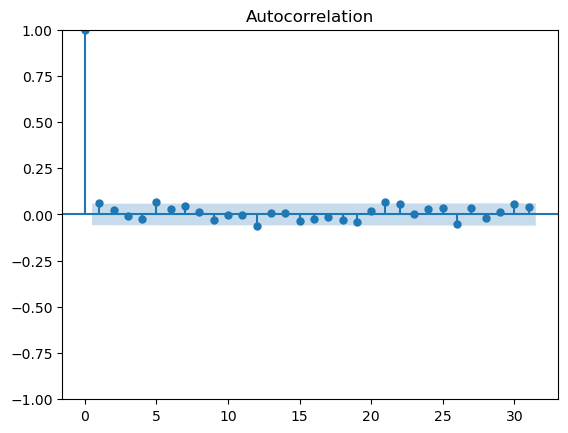

In [10]:
# ACF Correlogram
plot_acf(market_returns, alpha=0.05);

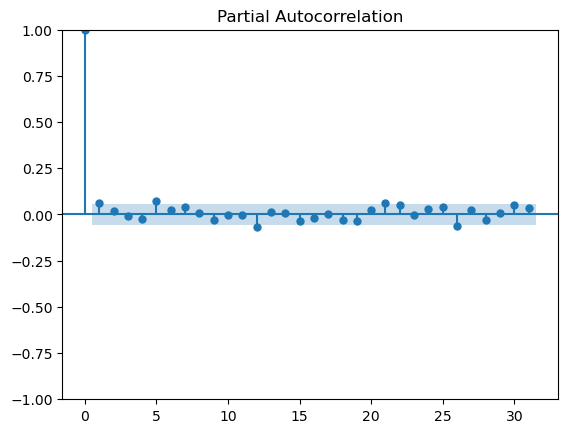

In [11]:
# PACF Correlogram
plot_pacf(market_returns, alpha=0.05);

## Estimating GARCH(1,1) Model with Gaussian or Normal distribution

In [12]:
# GARCH(1,1) Model with Gaussian or Normal distribution
market_garch_norm = arch_model(market_returns, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
market_garch_norm_result = market_garch_norm.fit(disp='off')
market_garch_norm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1820.29
Distribution:                  Normal   AIC:                           3648.59
Method:            Maximum Likelihood   BIC:                           3668.74
                                        No. Observations:                 1138
Date:                Thu, Jul 25 2024   Df Residuals:                     1137
Time:                        21:33:15   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0771  3.527e-02      2.187  2.873e-02 [8.011e-03,  0.146]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0842  4.623e-02      1.820  6.870e-02 [-6.452e-03,  0.175]
alpha[1]       0.1169  3.201e-02      3.652  2.604e-04  [5.415e-02,  0.180]
beta[1]        0.8368  5.328e-02     15.704  1.425e-55    [  0.732,  0.941]
===========================================================================

Covariance estimator: robust
"""

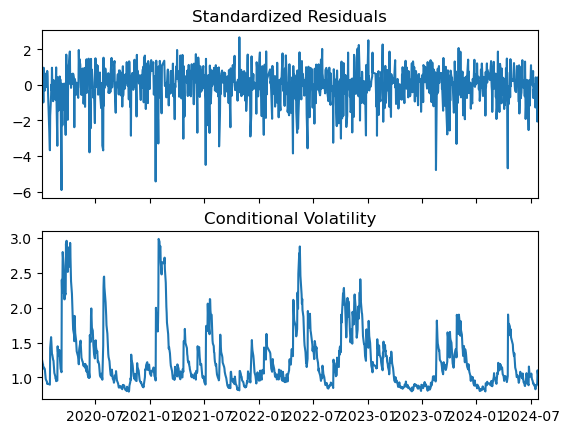

In [13]:
market_garch_norm_result.plot();

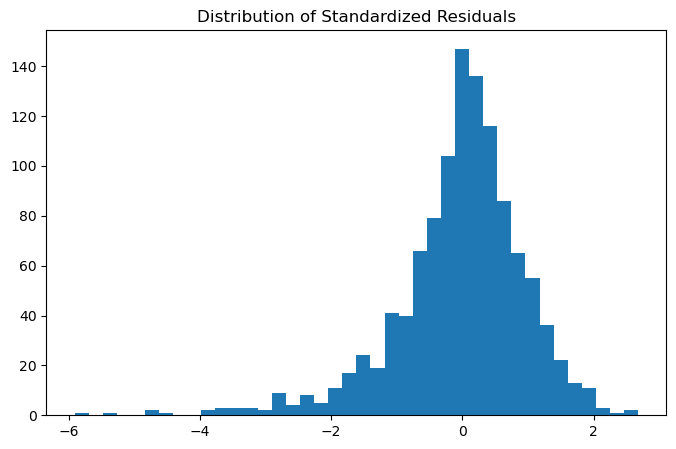

In [14]:
# Standardized Residuals
market_garch_norm_std_resid = market_garch_norm_result.resid / market_garch_norm_result.conditional_volatility

# Plotting Histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(market_garch_norm_std_resid, bins=40)
ax.set(title="Distribution of Standardized Residuals");

In [15]:
# Standardized Residuals test
# Ljung–Box test
market_garch_norm_lb_test = acorr_ljungbox(market_garch_norm_std_resid, lags=10)

market_garch_norm_p_values = pd.DataFrame({'P-values': market_garch_norm_lb_test['lb_pvalue']}).T

market_garch_norm_col_num = market_garch_norm_p_values.shape[1]
market_garch_norm_col_names = ['Lag '+str(num) for num in list(range(1, market_garch_norm_col_num+1, 1))]

market_garch_norm_p_values.columns = market_garch_norm_col_names
market_garch_norm_p_values

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10
P-values,0.048381,0.129636,0.249029,0.386805,0.258139,0.272717,0.3173,0.409955,0.450509,0.461148


In [16]:
market_garch_norm_lb_test

,lb_stat,lb_pvalue
1,3.896688,0.048381
2,4.086051,0.129636
3,4.117724,0.249029
4,4.144488,0.386805
5,6.528424,0.258139
6,7.552962,0.272717
7,8.176359,0.317300
8,8.244539,0.409955
9,8.857730,0.450509
10,9.767223,0.461148


## Estimating GARCH(1,1) Model with Skew-t distribution

In [17]:
# GARCH(1,1) Model with Skew-t distribution
market_garch_skewt = arch_model(market_returns, p=1, q=1, mean='constant', vol='GARCH', dist='skewt')
market_garch_skewt_result = market_garch_skewt.fit(disp='off')
market_garch_skewt_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                             Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -1721.82
Distribution:      Standardized Skew Student's t   AIC:                           3455.64
Method:                       Maximum Likelihood   BIC:                           3485.86
                                                   No. Observations:                 1138
Date:                           Thu, Jul 25 2024   Df Residuals:                     1137
Time:                                   21:33:16   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0874  3.151e-02      2.775  5.519e-03 [2.568e-02,  0.149]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1334  5.640e-02      2.365  1.802e-02 [2.286e-02,  0.244]
alpha[1]       0.1781  4.577e-02      3.892  9.953e-05 [8.841e-02,  0.268]
beta[1]        0.7564  6.613e-02     11.438  2.707e-30   [  0.627,  0.886]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
eta            4.1419      0.524      7.909  2.596e-15 [  3.115,  5.168]
lambda        -0.2087  3.869e-02     -5.393  6.942e-08 [ -0.285, -0.133]
========================================================================

Covariance estimator: robust
"""

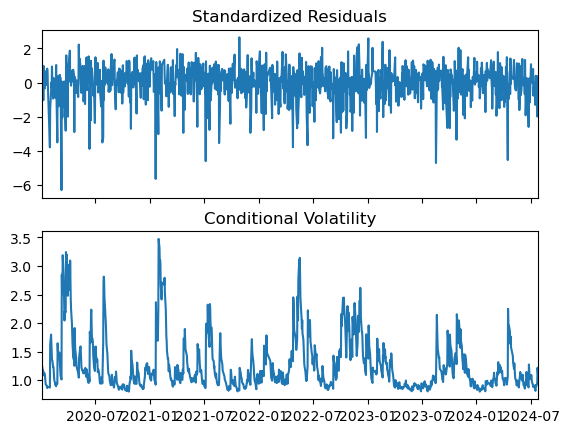

In [18]:
market_garch_skewt_result.plot();

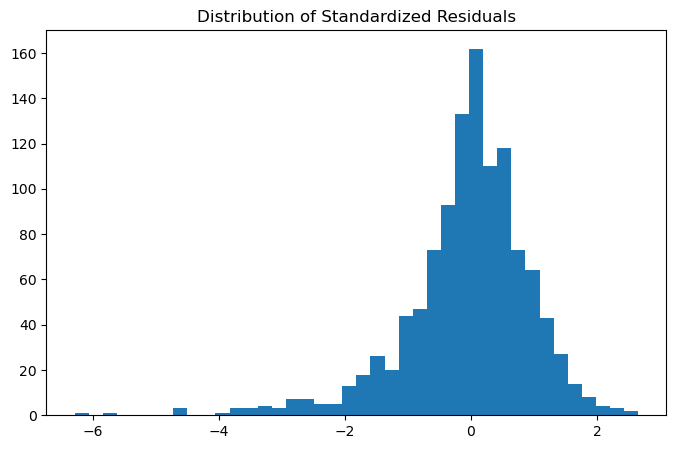

In [19]:
# Standardized Residuals
market_garch_skewt_std_resid = market_garch_skewt_result.resid / market_garch_skewt_result.conditional_volatility

# Plotting Histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(market_garch_skewt_std_resid, bins=40)
ax.set(title="Distribution of Standardized Residuals");

In [20]:
# Standardized Residuals test
# Ljung–Box test
market_garch_skewt_lb_test = acorr_ljungbox(market_garch_skewt_std_resid, lags=10)

market_garch_skewt_p_values = pd.DataFrame({'P-values': market_garch_skewt_lb_test['lb_pvalue']}).T

market_garch_skewt_col_num = market_garch_skewt_p_values.shape[1]
market_garch_skewt_col_names = ['Lag '+str(num) for num in list(range(1, market_garch_skewt_col_num+1, 1))]

market_garch_skewt_p_values.columns = market_garch_skewt_col_names
market_garch_skewt_p_values

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10
P-values,0.038706,0.113402,0.223625,0.352321,0.264499,0.298934,0.350418,0.444307,0.464869,0.451267


In [21]:
market_garch_skewt_lb_test

,lb_stat,lb_pvalue
1,4.273721,0.038706
2,4.353628,0.113402
3,4.375961,0.223625
4,4.418503,0.352321
5,6.454166,0.264499
6,7.243282,0.298934
7,7.801546,0.350418
8,7.889815,0.444307
9,8.705736,0.464869
10,9.877939,0.451267


## Estimating EGARCH(1,1,1) Model with Skew-t distribution

In [22]:
# EGARCH(1,1,1) Model with Skew-t distribution
market_egarch_skewt = arch_model(market_returns, p=1, q=1, o=1, mean='constant', vol='EGARCH', dist='skewt')
market_egarch_skewt_result = market_egarch_skewt.fit(disp='off')
market_egarch_skewt_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - EGARCH Model Results                          
=========================================================================================
Dep. Variable:                             Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                EGARCH   Log-Likelihood:               -1710.55
Distribution:      Standardized Skew Student's t   AIC:                           3435.11
Method:                       Maximum Likelihood   BIC:                           3470.37
                                                   No. Observations:                 1138
Date:                           Thu, Jul 25 2024   Df Residuals:                     1137
Time:                                   21:33:17   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0686  3.948e-03     17.380  1.169e-67 [6.088e-02,7.636e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0435  1.718e-02      2.529  1.143e-02 [9.780e-03,7.714e-02]
alpha[1]       0.2341  4.486e-02      5.219  1.800e-07     [  0.146,  0.322]
gamma[1]      -0.1396  3.020e-02     -4.621  3.818e-06  [ -0.199,-8.038e-02]
beta[1]        0.9182  2.672e-02     34.369 7.302e-259     [  0.866,  0.971]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
eta            4.4534      0.604      7.371  1.698e-13 [  3.269,  5.638]
lambda        -0.2197  3.802e-02     -5.779  7.529e-09 [ -0.294, -0.145]
========================================================================

Covariance estimator: robust
"""

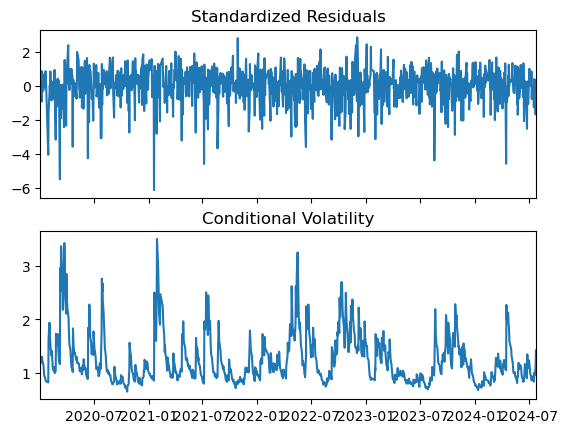

In [23]:
market_egarch_skewt_result.plot();

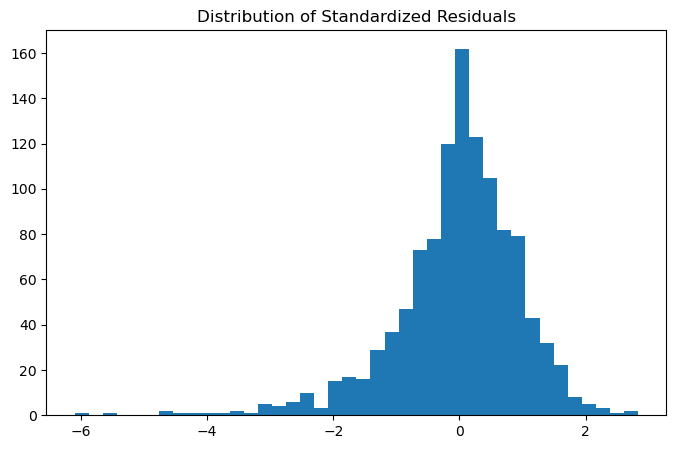

In [24]:
# Standardized Residuals
market_egarch_skewt_std_resid = market_egarch_skewt_result.resid / market_egarch_skewt_result.conditional_volatility

# Plotting Histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(market_egarch_skewt_std_resid, bins=40)
ax.set(title="Distribution of Standardized Residuals");

In [25]:
# Standardized Residuals test
# Ljung–Box test
market_egarch_skewt_lb_test = acorr_ljungbox(market_egarch_skewt_std_resid, lags=10)

market_egarch_skewt_p_values = pd.DataFrame({'P-values': market_egarch_skewt_lb_test['lb_pvalue']}).T

market_egarch_skewt_col_num = market_egarch_skewt_p_values.shape[1]
market_egarch_skewt_col_names = ['Lag '+str(num) for num in list(range(1, market_egarch_skewt_col_num+1, 1))]

market_egarch_skewt_p_values.columns = market_egarch_skewt_col_names
market_egarch_skewt_p_values

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10
P-values,0.020056,0.063023,0.136303,0.234084,0.209664,0.258175,0.302697,0.398331,0.431193,0.507254


In [26]:
market_egarch_skewt_lb_test

,lb_stat,lb_pvalue
1,5.407030,0.020056
2,5.528504,0.063023
3,5.539370,0.136303
4,5.564891,0.234084
5,7.150801,0.209664
6,7.734907,0.258175
7,8.350579,0.302697
8,8.368454,0.398331
9,9.066128,0.431193
10,9.263915,0.507254


## Estimating GJR-GARCH(1,1,1) Model with Skew-t distribution

In [27]:
# GJR-GARCH(1,1,1) Model with Skew-t distribution
market_gjrgarch_skewt = arch_model(market_returns, p=1, q=1, o=1, mean='constant', vol='GARCH', dist='skewt')
market_gjrgarch_skewt_result = market_gjrgarch_skewt.fit(disp='off')
market_gjrgarch_skewt_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GJR-GARCH Model Results                         
=========================================================================================
Dep. Variable:                             Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -1713.16
Distribution:      Standardized Skew Student's t   AIC:                           3440.31
Method:                       Maximum Likelihood   BIC:                           3475.57
                                                   No. Observations:                 1138
Date:                           Thu, Jul 25 2024   Df Residuals:                     1137
Time:                                   21:33:17   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0717  3.174e-02      2.259  2.390e-02 [9.484e-03,  0.134]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1758  6.756e-02      2.602  9.265e-03  [4.338e-02,  0.308]
alpha[1]       0.0549  3.040e-02      1.806  7.086e-02 [-4.668e-03,  0.114]
gamma[1]       0.2201  8.010e-02      2.748  5.996e-03  [6.312e-02,  0.377]
beta[1]        0.7292  7.588e-02      9.610  7.271e-22    [  0.580,  0.878]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
eta            4.1901      0.530      7.904  2.693e-15 [  3.151,  5.229]
lambda        -0.2169  4.099e-02     -5.292  1.210e-07 [ -0.297, -0.137]
========================================================================

Covariance estimator: robust
"""

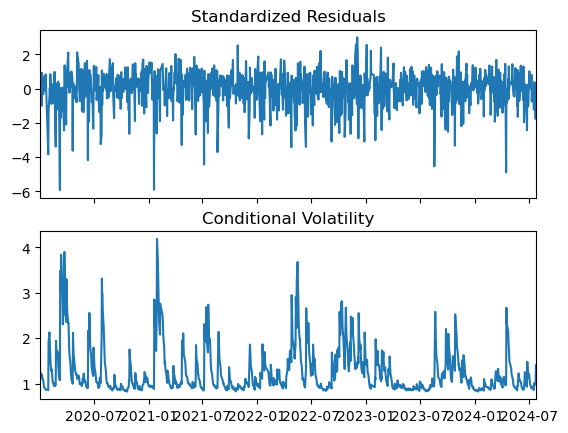

In [28]:
market_gjrgarch_skewt_result.plot();

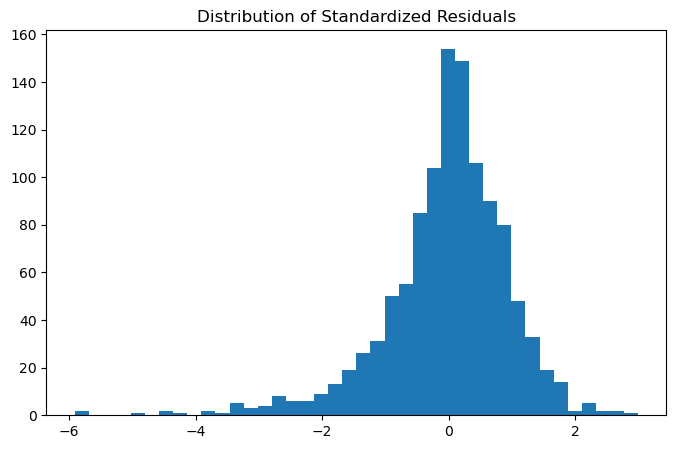

In [29]:
# Standardized Residuals
market_gjrgarch_skewt_std_resid = market_gjrgarch_skewt_result.resid / market_gjrgarch_skewt_result.conditional_volatility

# Plotting Histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(market_gjrgarch_skewt_std_resid, bins=40)
ax.set(title="Distribution of Standardized Residuals");

In [30]:
# Standardized Residuals test
# Ljung–Box test
market_gjrgarch_skewt_lb_test = acorr_ljungbox(market_gjrgarch_skewt_std_resid, lags=10)

market_gjrgarch_skewt_p_values = pd.DataFrame({'P-values': market_gjrgarch_skewt_lb_test['lb_pvalue']}).T

market_gjrgarch_skewt_col_num = market_gjrgarch_skewt_p_values.shape[1]
market_gjrgarch_skewt_col_names = ['Lag '+str(num) for num in list(range(1, market_gjrgarch_skewt_col_num+1, 1))]

market_gjrgarch_skewt_p_values.columns = market_gjrgarch_skewt_col_names
market_gjrgarch_skewt_p_values

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10
P-values,0.018975,0.060786,0.131741,0.2218,0.203147,0.268686,0.323436,0.412278,0.42697,0.460291


In [31]:
market_gjrgarch_skewt_lb_test

,lb_stat,lb_pvalue
1,5.503783,0.018975
2,5.600786,0.060786
3,5.618139,0.131741
4,5.710949,0.221800
5,7.243570,0.203147
6,7.602606,0.268686
7,8.104887,0.323436
8,8.220030,0.412278
9,9.112341,0.426970
10,9.776777,0.460291


Get parameter stats from all models summary

In [32]:
market_parameters = pd.DataFrame({'(1) GARCH Norm': market_garch_norm_result.params,
                                  '(1) P-value': market_garch_norm_result.pvalues,
                                  '(2) GARCH Skew-t': market_garch_skewt_result.params,
                                  '(2) P-value': market_garch_skewt_result.pvalues,
                                  '(3) EGARCH Skew-t': market_egarch_skewt_result.params,
                                  '(3) P-value': market_egarch_skewt_result.pvalues,
                                  '(4) GJR-GARCH Skew-t': market_gjrgarch_skewt_result.params,
                                  '(4) P-value': market_gjrgarch_skewt_result.pvalues})

market_parameters

,(1) GARCH Norm,(1) P-value,(2) GARCH Skew-t,(2) P-value,(3) EGARCH Skew-t,(3) P-value,(4) GJR-GARCH Skew-t,(4) P-value
alpha[1],0.116883,2.604242e-04,0.178112,9.953035e-05,0.234127,1.799937e-07,0.054915,7.085605e-02
beta[1],0.836756,1.424987e-55,0.756377,2.706545e-30,0.918230,7.302086e-259,0.729179,7.270928e-22
eta,NaN,NaN,4.141875,2.595776e-15,4.453404,1.697762e-13,4.190121,2.693368e-15
gamma[1],NaN,NaN,NaN,NaN,-0.139578,3.817708e-06,0.220103,5.996256e-03
lambda,NaN,NaN,-0.208668,6.942273e-08,-0.219729,7.529221e-09,-0.216924,1.210042e-07
mu,0.077130,2.873240e-02,0.087436,5.519308e-03,0.068620,1.168584e-67,0.071692,2.389771e-02
omega,0.084151,6.870015e-02,0.133408,1.802110e-02,0.043459,1.143418e-02,0.175789,9.265208e-03


Choosing the best GARCH-Family Model

In [33]:
def market_goodness_of_fit():
    global df_market
    model_names = ['GARCH Norm', 'GARCH Skew-t', 'EGARCH Skew-t', 'GJR-GARCH Skew-t']
    models = [market_garch_norm_result, market_garch_skewt_result, market_egarch_skewt_result, market_gjrgarch_skewt_result]
    likelihood = [model.loglikelihood for model in models]
    aic = [model.aic for model in models]
    bic = [model.bic for model in models]
    dict = {'VNINDEX':model_names, 'Log Likelihood':likelihood, 'AIC':aic,'BIC':bic}
    df_market = pd.DataFrame(dict).set_index('VNINDEX')   
    return df_market

market_goodness_of_fit()

,Log Likelihood,AIC,BIC
VNINDEX,,,
GARCH Norm,-1820.294787,3648.589575,3668.737685
GARCH Skew-t,-1721.821034,3455.642067,3485.864233
EGARCH Skew-t,-1710.554189,3435.108378,3470.367571
GJR-GARCH Skew-t,-1713.156056,3440.312111,3475.571305


In [34]:
# Highlight Maximum Log Likelihood
df_market.style.highlight_max(subset='Log Likelihood', color='yellow', axis=0)

,Log Likelihood,AIC,BIC
VNINDEX,,,
GARCH Norm,-1820.294787,3648.589575,3668.737685
GARCH Skew-t,-1721.821034,3455.642067,3485.864233
EGARCH Skew-t,-1710.554189,3435.108378,3470.367571
GJR-GARCH Skew-t,-1713.156056,3440.312111,3475.571305


In [35]:
# Highlight Minimum AIC and BIC
df_market.style.highlight_min(subset=['AIC', 'BIC'], color='yellow', axis=0)

,Log Likelihood,AIC,BIC
VNINDEX,,,
GARCH Norm,-1820.294787,3648.589575,3668.737685
GARCH Skew-t,-1721.821034,3455.642067,3485.864233
EGARCH Skew-t,-1710.554189,3435.108378,3470.367571
GJR-GARCH Skew-t,-1713.156056,3440.312111,3475.571305


## Applying GARCH-Family Model for stock

In [36]:
# Getting stock data
STOCK = 'VCB'

stock = Vnstock().stock(symbol=STOCK, source='VCI')
df = stock.quote.history(start=start, end=end)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df.set_index('Date', inplace=True)
df

2024-07-25 21:33:19,051 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02 07:00:00,58.65,59.43,58.32,59.04,386290
2020-01-03 07:00:00,59.49,59.69,58.45,58.45,536130
2020-01-06 07:00:00,58.00,58.19,56.89,56.89,880110
2020-01-07 07:00:00,56.57,57.15,55.53,57.09,1013270
2020-01-08 07:00:00,56.50,57.15,56.05,56.57,722280
...,...,...,...,...,...
2024-07-19 07:00:00,88.00,88.80,87.50,87.50,1323100
2024-07-22 07:00:00,87.50,88.30,87.30,87.70,1461100
2024-07-23 07:00:00,87.80,88.30,87.50,87.50,1410400


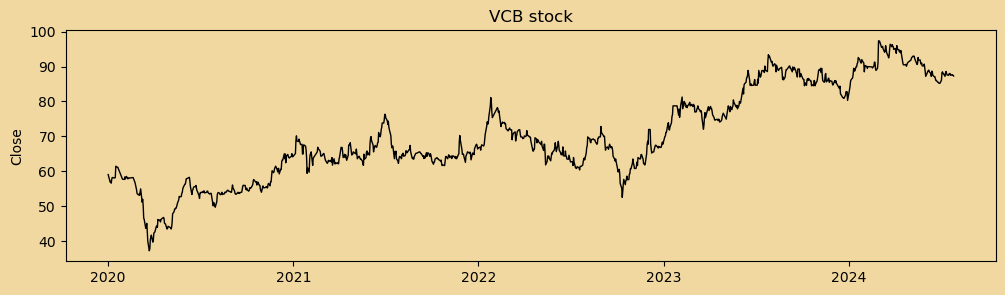

In [37]:
# Plotting Close Price of stock
fig, ax = plt.subplots(figsize=(12,3))
fig.set_facecolor("#F0D8A0")
ax.set_facecolor("#F0D8A0")
ax.plot(df.Close, linewidth=1, color='k')
ax.set(title=f"{STOCK} stock", ylabel='Close');

In [38]:
# Calculating Daily Simple Return of stock
stock_returns = (df.Close.pct_change().dropna()) * 100
stock_returns

Date
2020-01-03 07:00:00   -0.999322
2020-01-06 07:00:00   -2.668948
2020-01-07 07:00:00    0.351556
2020-01-08 07:00:00   -0.910843
2020-01-09 07:00:00    1.944494
                         ...   
2024-07-19 07:00:00   -0.568182
2024-07-22 07:00:00    0.228571
2024-07-23 07:00:00   -0.228050
2024-07-24 07:00:00    0.000000
2024-07-25 07:00:00   -0.228571
Name: Close, Length: 1138, dtype: float64

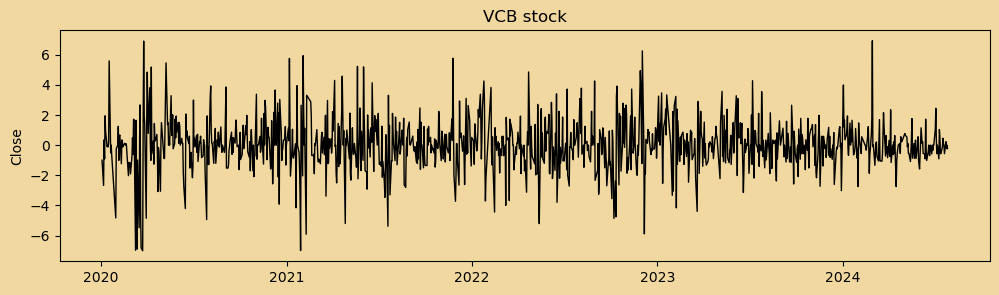

In [39]:
# Plotting % Return of stock
fig, ax = plt.subplots(figsize=(12,3))
fig.set_facecolor("#F0D8A0")
ax.set_facecolor("#F0D8A0")
ax.plot(stock_returns, linewidth=1, color='k')
ax.set(title=f"{STOCK} stock", ylabel='Close');

In [40]:
# Stationarity Test (ADF test)
stock_adf_test = adfuller(stock_returns)
print("ADF Statistic:", round(stock_adf_test[0], 3))
print("P-value:", round(stock_adf_test[1], 2))
print("Critical Values:")
for key, value in stock_adf_test[4].items():
    print(f'   {key}: {value}')

if stock_adf_test[1] < 0.05:
    print(f"Return series of {STOCK} stock is stationary")
else:
    print(f"Return series of {STOCK} stock is not stationary")

ADF Statistic: -14.883
P-value: 0.0
Critical Values:
   1%: -3.436134799128575
   5%: -2.8640943408409716
   10%: -2.568129999345636
Return series of VCB stock is stationary


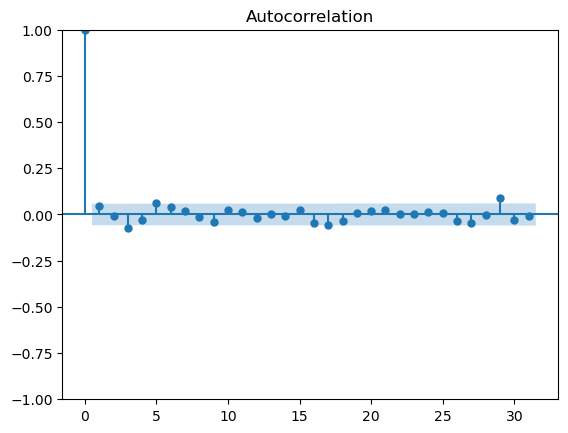

In [41]:
# ACF Correlogram
plot_acf(stock_returns, alpha=0.05);

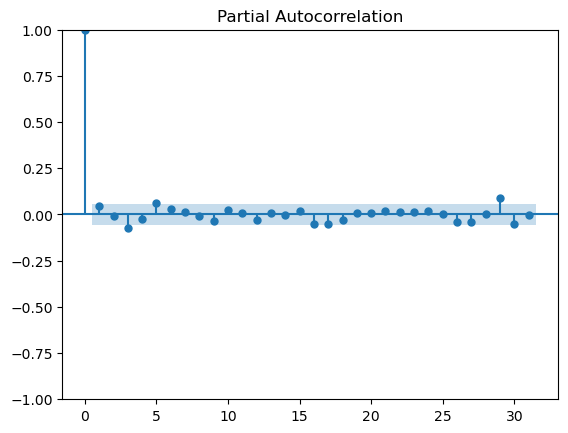

In [42]:
# PACF Correlogram
plot_pacf(stock_returns, alpha=0.05);

## Estimating GARCH(1,1) Model with Gaussian or Normal distribution

In [43]:
# GARCH(1,1) Model with Gaussian or Normal distribution
garch_norm = arch_model(stock_returns, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
garch_norm_result = garch_norm.fit(disp='off')
garch_norm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2142.95
Distribution:                  Normal   AIC:                           4293.90
Method:            Maximum Likelihood   BIC:                           4314.05
                                        No. Observations:                 1138
Date:                Thu, Jul 25 2024   Df Residuals:                     1137
Time:                        21:33:20   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0505  4.440e-02      1.138      0.255 [-3.648e-02,  0.138]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5174      0.146      3.548  3.876e-04   [  0.232,  0.803]
alpha[1]       0.1979  5.468e-02      3.619  2.960e-04 [9.071e-02,  0.305]
beta[1]        0.6251  8.071e-02      7.745  9.563e-15   [  0.467,  0.783]
==========================================================================

Covariance estimator: robust
"""

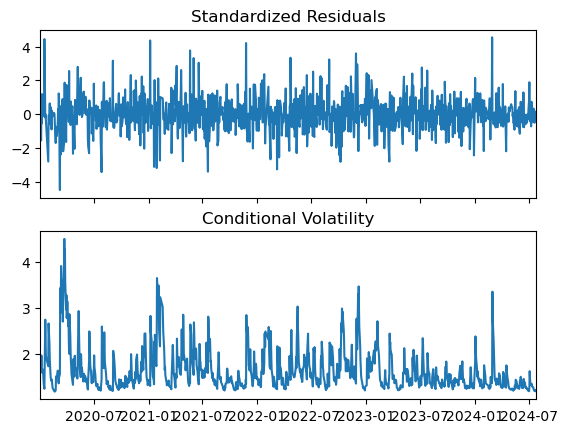

In [44]:
garch_norm_result.plot();

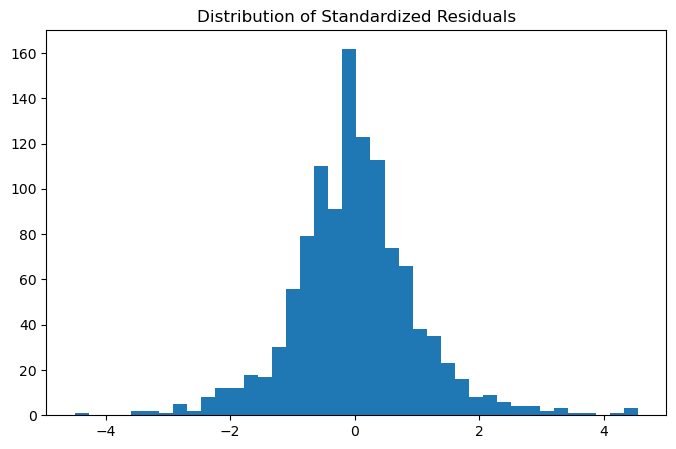

In [45]:
# Standardized Residuals
garch_norm_std_resid = garch_norm_result.resid / garch_norm_result.conditional_volatility

# Plotting Histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(garch_norm_std_resid, bins=40)
ax.set(title="Distribution of Standardized Residuals");

In [46]:
# Standardized Residuals test
# Ljung–Box test
garch_norm_lb_test = acorr_ljungbox(garch_norm_std_resid, lags=10)

garch_norm_p_values = pd.DataFrame({'P-values': garch_norm_lb_test['lb_pvalue']}).T

garch_norm_col_num = garch_norm_p_values.shape[1]
garch_norm_col_names = ['Lag '+str(num) for num in list(range(1, garch_norm_col_num+1, 1))]

garch_norm_p_values.columns = garch_norm_col_names
garch_norm_p_values

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10
P-values,0.361213,0.644021,0.438864,0.604025,0.632029,0.733757,0.784124,0.858694,0.832409,0.862766


In [47]:
garch_norm_lb_test

,lb_stat,lb_pvalue
1,0.833673,0.361213
2,0.880048,0.644021
3,2.708033,0.438864
4,2.729713,0.604025
5,3.443002,0.632029
6,3.576560,0.733757
7,3.962169,0.784124
8,3.982555,0.858694
9,5.021741,0.832409
10,5.401905,0.862766


## Estimating GARCH(1,1) Model with Skew-t distribution

In [48]:
# GARCH(1,1) Model with Skew-t distribution
garch_skewt = arch_model(stock_returns, p=1, q=1, mean='constant', vol='GARCH', dist='skewt')
garch_skewt_result = garch_skewt.fit(disp='off')
garch_skewt_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                             Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -2081.88
Distribution:      Standardized Skew Student's t   AIC:                           4175.75
Method:                       Maximum Likelihood   BIC:                           4205.97
                                                   No. Observations:                 1138
Date:                           Thu, Jul 25 2024   Df Residuals:                     1137
Time:                                   21:33:21   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0259  4.375e-02      0.593      0.553 [-5.981e-02,  0.112]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5060      0.158      3.212  1.317e-03 [  0.197,  0.815]
alpha[1]       0.2897  7.049e-02      4.109  3.973e-05 [  0.151,  0.428]
beta[1]        0.6014  8.061e-02      7.460  8.648e-14 [  0.443,  0.759]
                                 Distribution                                
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
eta            3.7757      0.414      9.121  7.428e-20      [  2.964,  4.587]
lambda         0.0314  3.500e-02      0.897      0.370 [-3.721e-02,9.999e-02]
=============================================================================

Covariance estimator: robust
"""

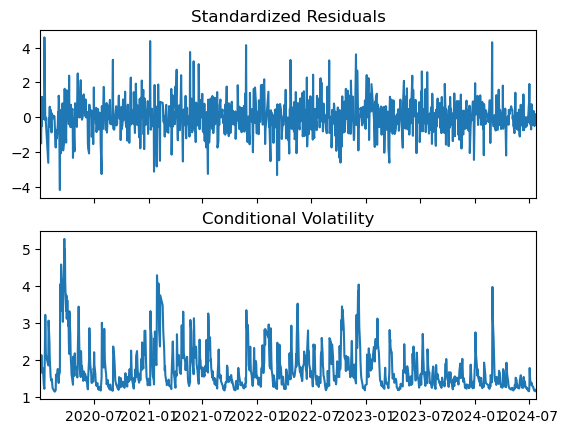

In [49]:
garch_skewt_result.plot();

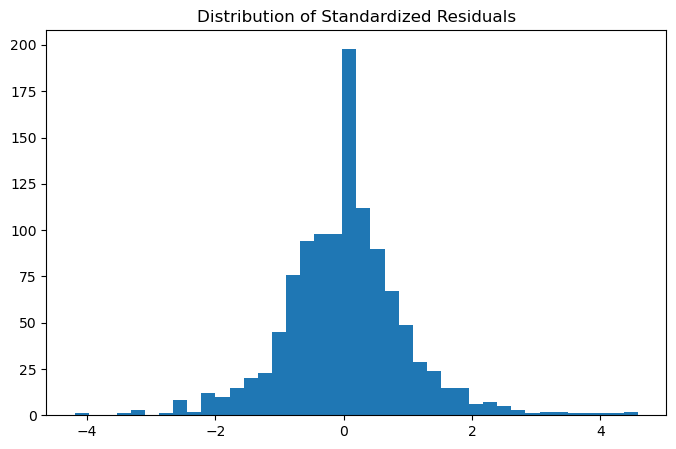

In [50]:
# Standardized Residuals
garch_skewt_std_resid = garch_skewt_result.resid / garch_skewt_result.conditional_volatility

# Plotting Histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(garch_skewt_std_resid, bins=40)
ax.set(title="Distribution of Standardized Residuals");

In [51]:
# Standardized Residuals test
# Ljung–Box test
garch_skewt_lb_test = acorr_ljungbox(garch_skewt_std_resid, lags=10)

garch_skewt_p_values = pd.DataFrame({'P-values': garch_skewt_lb_test['lb_pvalue']}).T

garch_skewt_col_num = garch_skewt_p_values.shape[1]
garch_skewt_col_names = ['Lag '+str(num) for num in list(range(1, garch_skewt_col_num+1, 1))]

garch_skewt_p_values.columns = garch_skewt_col_names
garch_skewt_p_values

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10
P-values,0.387403,0.667933,0.491422,0.659422,0.704779,0.805313,0.842048,0.902962,0.865164,0.889674


In [52]:
garch_skewt_lb_test

,lb_stat,lb_pvalue
1,0.747079,0.387403
2,0.807136,0.667933
3,2.411909,0.491422
4,2.417751,0.659422
5,2.968910,0.704779
6,3.028094,0.805313
7,3.435131,0.842048
8,3.450966,0.902962
9,4.631659,0.865164
10,5.022439,0.889674


## Estimating EGARCH(1,1,1) Model with Skew-t distribution

In [53]:
# EGARCH(1,1,1) Model with Skew-t distribution
egarch_skewt = arch_model(stock_returns, p=1, q=1, o=1, mean='constant', vol='EGARCH', dist='skewt')
egarch_skewt_result = egarch_skewt.fit(disp='off')
egarch_skewt_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - EGARCH Model Results                          
=========================================================================================
Dep. Variable:                             Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                EGARCH   Log-Likelihood:               -2084.25
Distribution:      Standardized Skew Student's t   AIC:                           4182.51
Method:                       Maximum Likelihood   BIC:                           4217.77
                                                   No. Observations:                 1138
Date:                           Thu, Jul 25 2024   Df Residuals:                     1137
Time:                                   21:33:22   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0160  4.559e-02      0.351      0.725 [-7.334e-02,  0.105]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2196  8.085e-02      2.716  6.611e-03 [6.111e-02,  0.378]
alpha[1]       0.4411  8.754e-02      5.039  4.668e-07   [  0.270,  0.613]
gamma[1]      -0.0463  4.300e-02     -1.077      0.281 [ -0.131,3.796e-02]
beta[1]        0.8376  6.456e-02     12.974  1.708e-38   [  0.711,  0.964]
                                 Distribution                                
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
eta            3.6842      0.397      9.288  1.574e-20      [  2.907,  4.462]
lambda         0.0234  3.519e-02      0.664      0.507 [-4.560e-02,9.233e-02]
=============================================================================

Covariance estimator: robust
"""

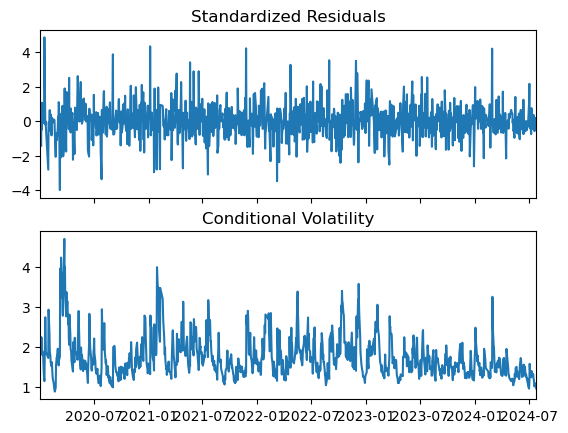

In [54]:
egarch_skewt_result.plot();

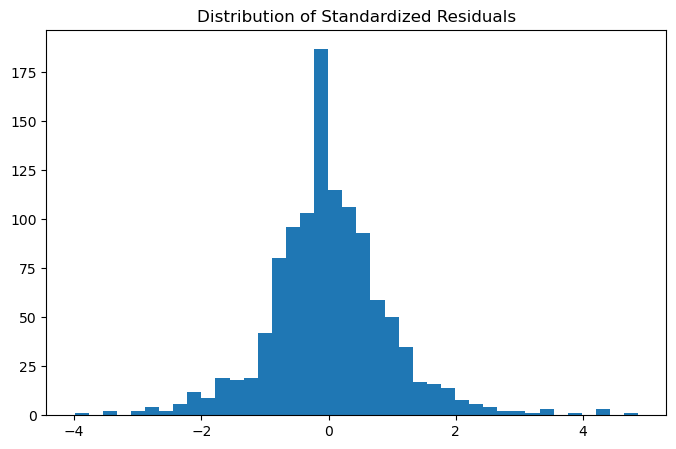

In [55]:
# Standardized Residuals
egarch_skewt_std_resid = egarch_skewt_result.resid / egarch_skewt_result.conditional_volatility

# Plotting Histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(egarch_skewt_std_resid, bins=40)
ax.set(title="Distribution of Standardized Residuals");

In [56]:
# Standardized Residuals test
# Ljung–Box test
egarch_skewt_lb_test = acorr_ljungbox(egarch_skewt_std_resid, lags=10)

egarch_skewt_p_values = pd.DataFrame({'P-values': egarch_skewt_lb_test['lb_pvalue']}).T

egarch_skewt_col_num = egarch_skewt_p_values.shape[1]
egarch_skewt_col_names = ['Lag '+str(num) for num in list(range(1, egarch_skewt_col_num+1, 1))]

egarch_skewt_p_values.columns = egarch_skewt_col_names
egarch_skewt_p_values

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10
P-values,0.340233,0.620717,0.387822,0.537572,0.583095,0.702914,0.750762,0.828722,0.777431,0.8036


In [57]:
egarch_skewt_lb_test

,lb_stat,lb_pvalue
1,0.909553,0.340233
2,0.953761,0.620717
3,3.024772,0.387822
4,3.122298,0.537572
5,3.769240,0.583095
6,3.805975,0.702914
7,4.248407,0.750762
8,4.303844,0.828722
9,5.618270,0.777431
10,6.137293,0.803600


## Estimating GJR-GARCH(1,1,1) Model with Skew-t distribution

In [58]:
# GJR-GARCH(1,1,1) Model with Skew-t distribution
gjrgarch_skewt = arch_model(stock_returns, p=1, q=1, o=1, mean='constant', vol='GARCH', dist='skewt')
gjrgarch_skewt_result = gjrgarch_skewt.fit(disp='off')
gjrgarch_skewt_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GJR-GARCH Model Results                         
=========================================================================================
Dep. Variable:                             Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -2081.00
Distribution:      Standardized Skew Student's t   AIC:                           4175.99
Method:                       Maximum Likelihood   BIC:                           4211.25
                                                   No. Observations:                 1138
Date:                           Thu, Jul 25 2024   Df Residuals:                     1137
Time:                                   21:33:23   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0127  4.582e-02      0.278      0.781 [-7.706e-02,  0.103]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5252      0.172      3.054  2.262e-03    [  0.188,  0.862]
alpha[1]       0.2339  7.048e-02      3.319  9.029e-04  [9.579e-02,  0.372]
gamma[1]       0.1241      0.106      1.172      0.241 [-8.335e-02,  0.332]
beta[1]        0.5932  8.553e-02      6.935  4.051e-12    [  0.426,  0.761]
                                 Distribution                                
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
eta            3.7664      0.415      9.074  1.148e-19      [  2.953,  4.580]
lambda         0.0261  3.563e-02      0.732      0.464 [-4.376e-02,9.589e-02]
=============================================================================

Covariance estimator: robust
"""

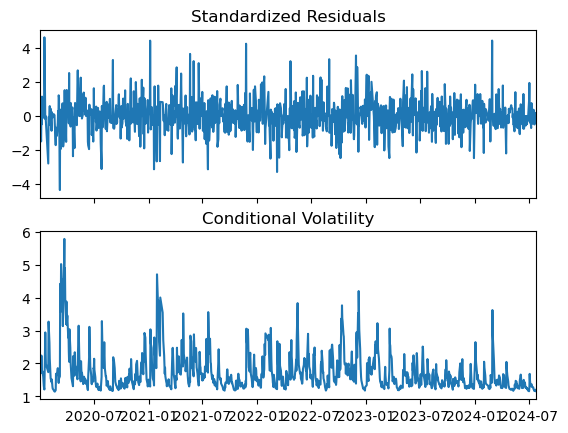

In [59]:
gjrgarch_skewt_result.plot();

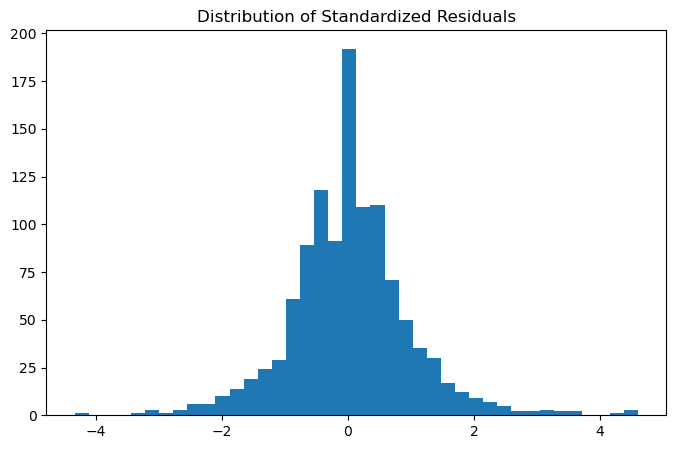

In [60]:
# Standardized Residuals
gjrgarch_skewt_std_resid = gjrgarch_skewt_result.resid / gjrgarch_skewt_result.conditional_volatility

# Plotting Histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(gjrgarch_skewt_std_resid, bins=40)
ax.set(title="Distribution of Standardized Residuals");

In [61]:
# Standardized Residuals test
# Ljung–Box test
gjrgarch_skewt_lb_test = acorr_ljungbox(gjrgarch_skewt_std_resid, lags=10)

gjrgarch_skewt_p_values = pd.DataFrame({'P-values': gjrgarch_skewt_lb_test['lb_pvalue']}).T

gjrgarch_skewt_col_num = gjrgarch_skewt_p_values.shape[1]
gjrgarch_skewt_col_names = ['Lag '+str(num) for num in list(range(1, gjrgarch_skewt_col_num+1, 1))]

gjrgarch_skewt_p_values.columns = gjrgarch_skewt_col_names
gjrgarch_skewt_p_values

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10
P-values,0.37037,0.649282,0.491131,0.658218,0.69901,0.800669,0.829421,0.894346,0.849862,0.880923


In [62]:
gjrgarch_skewt_lb_test

,lb_stat,lb_pvalue
1,0.802423,0.370370
2,0.863775,0.649282
3,2.413474,0.491131
4,2.424422,0.658218
5,3.006327,0.699010
6,3.064818,0.800669
7,3.554492,0.829421
8,3.561740,0.894346
9,4.818175,0.849862
10,5.150170,0.880923


Get parameter stats from all models summary

In [63]:
parameters = pd.DataFrame({'(1) GARCH Norm': garch_norm_result.params,
                           '(1) P-value': garch_norm_result.pvalues,
                           '(2) GARCH Skew-t': garch_skewt_result.params,
                           '(2) P-value': garch_skewt_result.pvalues,
                           '(3) EGARCH Skew-t': egarch_skewt_result.params,
                           '(3) P-value': egarch_skewt_result.pvalues,
                           '(4) GJR-GARCH Skew-t': gjrgarch_skewt_result.params,
                           '(4) P-value': gjrgarch_skewt_result.pvalues})

parameters

,(1) GARCH Norm,(1) P-value,(2) GARCH Skew-t,(2) P-value,(3) EGARCH Skew-t,(3) P-value,(4) GJR-GARCH Skew-t,(4) P-value
alpha[1],0.197880,2.959824e-04,0.289654,3.972537e-05,0.441149,4.667959e-07,0.233923,9.029275e-04
beta[1],0.625065,9.562997e-15,0.601358,8.647972e-14,0.837624,1.708261e-38,0.593209,4.050862e-12
eta,NaN,NaN,3.775737,7.427866e-20,3.684222,1.573618e-20,3.766358,1.147796e-19
gamma[1],NaN,NaN,NaN,NaN,-0.046318,2.813817e-01,0.124089,2.410184e-01
lambda,NaN,NaN,0.031392,3.697875e-01,0.023365,5.066548e-01,0.026067,4.643682e-01
mu,0.050538,2.549835e-01,0.025946,5.531878e-01,0.016014,7.254036e-01,0.012746,7.808831e-01
omega,0.517392,3.875563e-04,0.506018,1.316772e-03,0.219580,6.610936e-03,0.525178,2.261705e-03


Choosing the best GARCH-Family Model

In [64]:
def stock_goodness_of_fit():
    global df
    model_names = ['GARCH Norm', 'GARCH Skew-t', 'EGARCH Skew-t', 'GJR-GARCH Skew-t']
    models = [garch_norm_result, garch_skewt_result, egarch_skewt_result, gjrgarch_skewt_result]
    likelihood = [model.loglikelihood for model in models]
    aic = [model.aic for model in models]
    bic = [model.bic for model in models]
    dict = {f'{STOCK}':model_names, 'Log Likelihood':likelihood, 'AIC':aic,'BIC':bic}
    df = pd.DataFrame(dict).set_index(f'{STOCK}') 
    return df

stock_goodness_of_fit()

,Log Likelihood,AIC,BIC
VCB,,,
GARCH Norm,-2142.949419,4293.898839,4314.046949
GARCH Skew-t,-2081.875343,4175.750687,4205.972853
EGARCH Skew-t,-2084.253792,4182.507583,4217.766777
GJR-GARCH Skew-t,-2080.995798,4175.991596,4211.250789


In [65]:
# Highlight Maximum Log Likelihood
df.style.highlight_max(subset='Log Likelihood', color='yellow', axis=0)

,Log Likelihood,AIC,BIC
VCB,,,
GARCH Norm,-2142.949419,4293.898839,4314.046949
GARCH Skew-t,-2081.875343,4175.750687,4205.972853
EGARCH Skew-t,-2084.253792,4182.507583,4217.766777
GJR-GARCH Skew-t,-2080.995798,4175.991596,4211.250789


In [66]:
# Highlight Minimum AIC and BIC
df.style.highlight_min(subset=['AIC', 'BIC'], color='yellow', axis=0)

,Log Likelihood,AIC,BIC
VCB,,,
GARCH Norm,-2142.949419,4293.898839,4314.046949
GARCH Skew-t,-2081.875343,4175.750687,4205.972853
EGARCH Skew-t,-2084.253792,4182.507583,4217.766777
GJR-GARCH Skew-t,-2080.995798,4175.991596,4211.250789


## Estimating Dynamic Conditional Beta based on the best GARCH-Family Model

Correlation coefficient between VNINDEX and VCB stock is 0.596


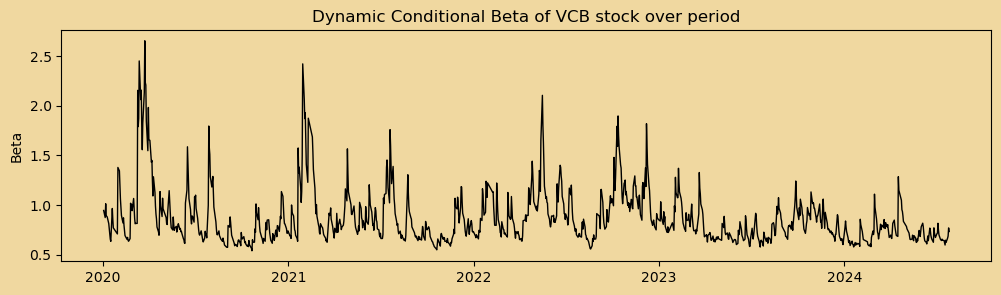

In [67]:
def compute_beta():
    global stock_beta
    # Calculating correlation coefficient
    correlation = np.corrcoef(gjrgarch_skewt_std_resid, market_egarch_skewt_std_resid)[0,1]
    
    # Calculating Dynamic Conditional Beta
    # VNINDEX's EGARCH(1,1,1) model with Skew-t distribution + Stock's GJR-GARCH(1,1,1) model with Skew-t distribution
    stock_beta = correlation * np.sqrt(gjrgarch_skewt_result.conditional_volatility * market_egarch_skewt_result.conditional_volatility)
    print(f"Correlation coefficient between VNINDEX and {STOCK} stock is", round(correlation, 3))
    
    # Plotting Conditional Volatility of Beta over period
    fig, ax = plt.subplots(figsize=(12,3))
    fig.set_facecolor("#F0D8A0")
    ax.set_facecolor("#F0D8A0")
    ax.plot(stock_beta, linewidth=1, color='k')
    ax.set(title=f"Dynamic Conditional Beta of {STOCK} stock over period", ylabel='Beta')
    
    return ax

compute_beta();

In [68]:
# Dynamic Condition Beta values over period
stock_beta

Date
2020-01-03 07:00:00    0.944825
2020-01-06 07:00:00    0.873474
2020-01-07 07:00:00    1.012769
2020-01-08 07:00:00    0.889699
2020-01-09 07:00:00    0.886947
                         ...   
2024-07-19 07:00:00    0.623370
2024-07-22 07:00:00    0.665854
2024-07-23 07:00:00    0.687347
2024-07-24 07:00:00    0.768885
2024-07-25 07:00:00    0.732500
Name: cond_vol, Length: 1138, dtype: float64

## Estimating Rolling Beta

In [69]:
PERIOD = 100

In [70]:
return_df = pd.DataFrame()
return_df['VNINDEX'] = market_returns
return_df[STOCK] = stock_returns
return_df

,VNINDEX,VCB
Date,,
2020-01-03 07:00:00,-0.158275,-0.999322
2020-01-06 07:00:00,-0.968771,-2.668948
2020-01-07 07:00:00,0.323293,0.351556
2020-01-08 07:00:00,-1.032455,-0.910843
2020-01-09 07:00:00,1.177053,1.944494
...,...,...
2024-07-19 07:00:00,-0.757980,-0.568182
2024-07-22 07:00:00,-0.801720,0.228571
2024-07-23 07:00:00,-1.819645,-0.228050


In [71]:
def calc_beta(df):
    np_array = df.values
    s = np_array[:,0]
    m = np_array[:,1]
    covariance = np.cov(s,m)
    beta = covariance[0,1]/covariance[1,1]
    return beta

In [72]:
def calc_rolling_beta(df, period, min_periods=None):
    if min_periods is None:
        min_periods = period
    result = pd.Series(np.nan, index=df.index)
    for i in range(period, df.shape[0] + 1):
        df2 = df.iloc[i - period:i,:]
        if df2.shape[0] >= min_periods:
            idx = df2.index[-1]
            result[idx] = calc_beta(df2)
    return result

In [73]:
# Rolling Beta Estimation
rolling_beta = calc_rolling_beta(return_df[['VNINDEX', STOCK]], period=PERIOD).dropna()
rolling_beta

Date
2020-06-02 07:00:00    0.586635
2020-06-03 07:00:00    0.587287
2020-06-04 07:00:00    0.589633
2020-06-05 07:00:00    0.589502
2020-06-08 07:00:00    0.589738
                         ...   
2024-07-19 07:00:00    0.513763
2024-07-22 07:00:00    0.509837
2024-07-23 07:00:00    0.726877
2024-07-24 07:00:00    0.727563
2024-07-25 07:00:00    0.727581
Length: 1039, dtype: float64

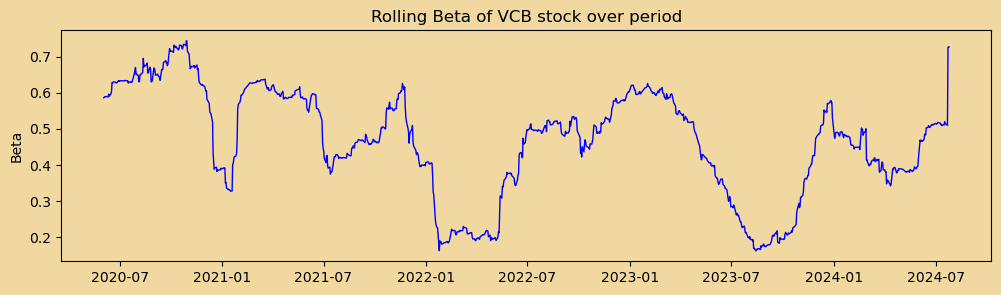

In [74]:
# Plotting Volatility of Rolling Beta over period
fig, ax = plt.subplots(figsize=(12,3))
fig.set_facecolor("#F0D8A0")
ax.set_facecolor("#F0D8A0")
ax.plot(rolling_beta, linewidth=1, color='blue')
ax.set(title=f"Rolling Beta of {STOCK} stock over period", ylabel='Beta');

## Estimating Historical Beta

In [75]:
# Calculating Covariance
return_df.cov()

,VNINDEX,VCB
VNINDEX,1.735728,1.433606
VCB,1.433606,2.857090


In [76]:
def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()

    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

In [77]:
# Historical Beta Estimation
alpha, historical_beta = linreg(return_df['VNINDEX'].values, return_df[STOCK].values)
print(f'Alpha of {STOCK} stock: ' + str(alpha))
print(f'Historical Beta of {STOCK} stock: ' + str(historical_beta))

Alpha of VCB stock: 0.023767688606573658
Historical Beta of VCB stock: 0.8259393173286148


In [78]:
# Historical Beta remains constant over time based on the dataset used
historical_beta = np.array([historical_beta]*return_df.shape[0])
historical_beta

array([0.82593932, 0.82593932, 0.82593932, ..., 0.82593932, 0.82593932,
       0.82593932])

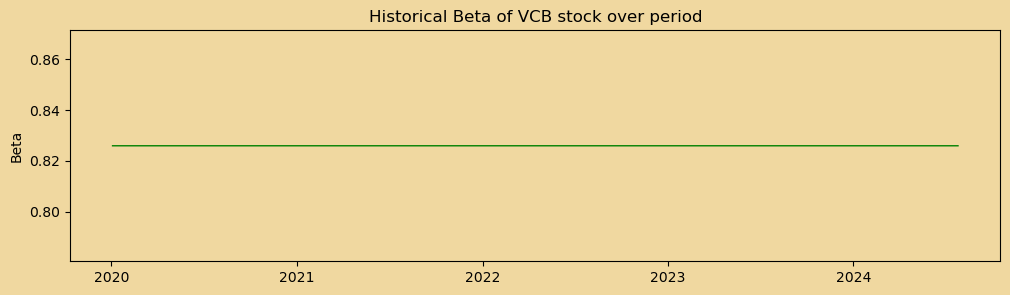

In [79]:
# Plotting Historical Beta over period
fig, ax = plt.subplots(figsize=(12,3))
fig.set_facecolor("#F0D8A0")
ax.set_facecolor("#F0D8A0")
ax.plot(return_df.index, historical_beta, linewidth=1, color='green')
ax.set(title=f"Historical Beta of {STOCK} stock over period", ylabel='Beta');

## Comparing Beta estimation methods including:
- Dyanmic Conditional Beta based on GARCH-Family Model
- Rolling Beta
- Historical Beta

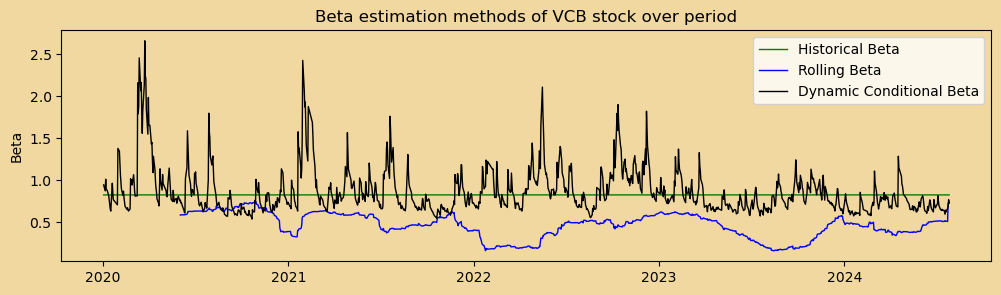

In [80]:
# Plotting Beta estimation methods over period
fig, ax = plt.subplots(figsize=(12,3))
fig.set_facecolor("#F0D8A0")
ax.set_facecolor("#F0D8A0")

# Historical Beta
ax.plot(return_df.index, historical_beta, label='Historical Beta', linewidth=1, color='green')

# Rolling Beta
ax.plot(rolling_beta, label='Rolling Beta', linewidth=1, color='blue')

# Dynamic Conditional Beta
ax.plot(stock_beta, label='Dynamic Conditional Beta', linewidth=1, color='k')

ax.set(title=f"Beta estimation methods of {STOCK} stock over period", ylabel='Beta')
ax.legend();